In [2]:
!unzip /content/Lung-X-Ray-Image.zip

Archive:  /content/Lung-X-Ray-Image.zip
   creating: Lung_Opacity/
   creating: Normal/
   creating: Viral Pneumonia/
  inflating: Normal/1151.jpg         
  inflating: Normal/1166.jpg         
  inflating: Normal/1048.jpg         
  inflating: Normal/875.jpg          
  inflating: Normal/44.jpg           
  inflating: Normal/1187.jpg         
  inflating: Normal/187.jpg          
  inflating: Normal/404.jpg          
  inflating: Normal/997.jpg          
  inflating: Normal/454.jpg          
  inflating: Normal/1188.jpg         
  inflating: Normal/1165.jpg         
  inflating: Normal/519.jpg          
  inflating: Normal/620.jpg          
  inflating: Normal/713.jpg          
  inflating: Normal/942.jpg          
  inflating: Normal/685.jpg          
  inflating: Normal/1243.jpg         
  inflating: Normal/143.jpg          
  inflating: Normal/742.jpg          
  inflating: Normal/1194.jpg         
  inflating: Normal/1077.jpg         
  inflating: Normal/572.jpg          
  inflat

In [4]:
!pip install imutils


  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=d98542f9efdfe62522bc51368fca8ed0080cbcfc849c8252cb23518942afbf12
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import pandas as pd

In [6]:
INIT_LR = 1e-3 # learning rate
EPOCHS = 25
BS = 10 #batch Size

In [8]:
dataset = '/content/Damn'
imagePaths = list(paths.list_images(dataset))
data = []
labels = []
print(imagePaths)

['/content/Damn/Viral Pneumonia/760.jpg', '/content/Damn/Viral Pneumonia/300.jpg', '/content/Damn/Viral Pneumonia/688.jpg', '/content/Damn/Viral Pneumonia/385.jpg', '/content/Damn/Viral Pneumonia/39.jpg', '/content/Damn/Viral Pneumonia/916.jpg', '/content/Damn/Viral Pneumonia/1016.jpg', '/content/Damn/Viral Pneumonia/769.jpg', '/content/Damn/Viral Pneumonia/249.jpg', '/content/Damn/Viral Pneumonia/478.jpg', '/content/Damn/Viral Pneumonia/447.jpg', '/content/Damn/Viral Pneumonia/761.jpg', '/content/Damn/Viral Pneumonia/825.jpg', '/content/Damn/Viral Pneumonia/28.jpg', '/content/Damn/Viral Pneumonia/477.jpg', '/content/Damn/Viral Pneumonia/870.jpg', '/content/Damn/Viral Pneumonia/913.jpg', '/content/Damn/Viral Pneumonia/1012.jpg', '/content/Damn/Viral Pneumonia/684.jpg', '/content/Damn/Viral Pneumonia/213.jpg', '/content/Damn/Viral Pneumonia/799.jpg', '/content/Damn/Viral Pneumonia/667.jpg', '/content/Damn/Viral Pneumonia/973.jpg', '/content/Damn/Viral Pneumonia/1079.jpg', '/content/Damn

In [9]:
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	# print(label)
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	data.append(image)
	labels.append(label)
print(len(data),len(labels))

3475 3475


In [11]:
print(labels)

['Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneu

In [13]:
# Assuming labels is your array of labels
unique_labels = list(set(labels))  # Get unique labels

# Create a dictionary to map each unique label to an integer class
label_map = {label: idx  for idx, label in enumerate(unique_labels)}

# Convert labels to classes using the map
classes = [label_map[label] for label in labels]

one_hot_encoded = to_categorical(classes, num_classes=3)

print(one_hot_encoded)




[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [39]:
data = np.array(data)
data.shape
one_hot_encoded.shape

(3475, 3)

In [40]:
trainX, testX, trainY, testY = train_test_split(data, one_hot_encoded, test_size=0.20, stratify=labels, random_state=42)

In [41]:
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

In [42]:
#transfer learning using pre trainded VGG16 model
Pre_Trained_Model = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

In [43]:
model = Pre_Trained_Model.output
model = AveragePooling2D(pool_size=(4, 4))(model)
model = Flatten(name="flatten")(model)
model = Dense(64, activation="relu")(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)

In [44]:
model = Model(inputs=Pre_Trained_Model.input, outputs=model)

In [45]:
for layer in Pre_Trained_Model.layers:
	layer.trainable = False

In [46]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
model.compile(loss='categorical_crossentropy',optimizer= opt, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [47]:
history = model.fit(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

Epoch 1/25
278/278 [==============================] - ETA: 0s - loss: 0.9982 - accuracy: 0.6763

278/278 [==============================] - 77s 276ms/step - loss: 0.9982 - accuracy: 0.6763 - val_loss: 0.4780 - val_accuracy: 0.8144
Epoch 2/25
278/278 [==============================] - 62s 221ms/step - loss: 0.5145 - accuracy: 0.7885
Epoch 3/25
278/278 [==============================] - 62s 222ms/step - loss: 0.4481 - accuracy: 0.8209
Epoch 4/25
278/278 [==============================] - 62s 222ms/step - loss: 0.4273 - accuracy: 0.8331
Epoch 5/25
278/278 [==============================] - 62s 221ms/step - loss: 0.4014 - accuracy: 0.8378
Epoch 6/25
278/278 [==============================] - 61s 220ms/step - loss: 0.3804 - accuracy: 0.8446
Epoch 7/25
278/278 [==============================] - 61s 219ms/step - loss: 0.3538 - accuracy: 0.8583
Epoch 8/25
278/278 [==============================] - 61s 218ms/step - loss: 0.3511 - accuracy: 0.8511
Epoch 9/25
278/278 [==============================] - 62s 221ms/step - loss: 0.3403 - accuracy: 0.8622
Epoch 10/25
278/278 [=====================

In [48]:
predIdxs = model.predict(testX, batch_size=BS)

70/70 [==============================] - 15s 219ms/step


In [49]:
predIdxs = np.argmax(predIdxs, axis=1)

In [51]:
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=unique_labels))

                 precision    recall  f1-score   support

   Lung_Opacity       0.89      0.86      0.88       225
         Normal       0.83      0.88      0.86       250
Viral Pneumonia       0.96      0.93      0.94       220

       accuracy                           0.89       695
      macro avg       0.89      0.89      0.89       695
   weighted avg       0.89      0.89      0.89       695



ValueError: x and y must have same first dimension, but have shapes (25,) and (1,)

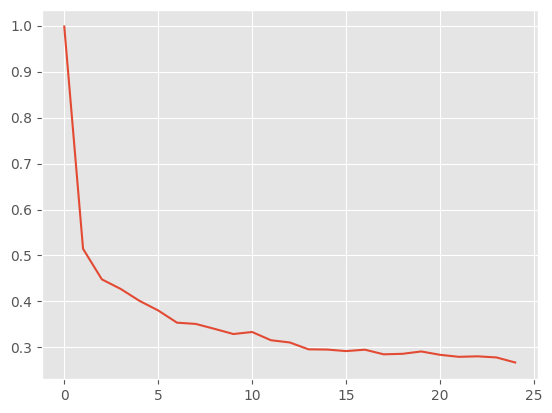

In [52]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

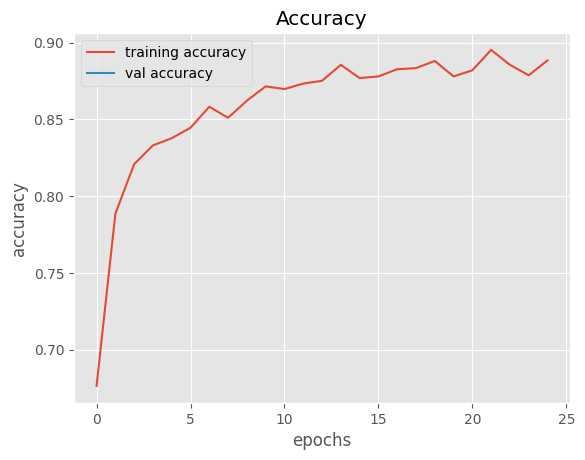

In [53]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

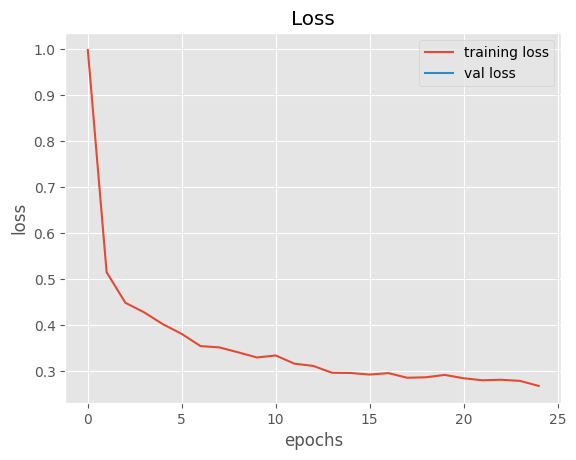

In [54]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [55]:
# evaluate the model
scores = model.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 92.30%


In [56]:
model.save('COVID-19', save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model from the h5 file
model = load_model('/content/COVID-19')  # Replace 'your_model.h5' with the path to your h5 file

# Function to preprocess an image to match the input shape expected by the model
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Assuming input shape is (224, 224, 3)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Path to the image you want to predict
image_path = '/content/lancet-case2b.jpg'  # Replace 'path_to_your_image.jpg' with the path to your image

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(preprocessed_image)

# Interpret the predictions
class_labels = ['Class 1', 'Class 2', 'Class 3']  # Replace with your class labels
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_label = unique_labels[predicted_class]  # Get the corresponding label

print("Predicted Class:", predicted_class)
print("Predicted Label:", predicted_label)
print("Confidence:", predictions[0][predicted_class])  # Confidence score for the predicted class


1/1 [==============================] - 0s 189ms/step
Predicted Class: 1
Predicted Label: Normal
Confidence: 0.79085755
